




























# Import library

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Deal W. Missing Values
from sklearn.impute import SimpleImputer #Imputation technic
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Deal W. Categorical Variables
from sklearn.preprocessing import OrdinalEncoder #Ordinal Encoder technic
from sklearn.preprocessing import OneHotEncoder #One Hot Encoder technic

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from category_encoders import MEstimateEncoder
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Load data

In [2]:
# Read the data
train = pd.read_csv('../input/home-data-for-ml-course/train.csv', index_col='Id')
test = pd.read_csv('../input/home-data-for-ml-course/test.csv', index_col='Id')

X_raw_full = train.copy(deep=True)

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Concat train and test

In [4]:
X = pd.concat([train.drop("SalePrice", axis=1),test], axis=0)
y = train[['SalePrice']]

In [5]:
[X.shape, y.shape]

[(2919, 79), (1460, 1)]

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [7]:
numeric_ = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
numeric_.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [8]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

cont_num_var = []
for i in numeric_.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)

In [9]:
cont_num_var

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [10]:
cat_train = X.select_dtypes(include=['object']).copy()
cat_train['MSSubClass'] = X['MSSubClass']   #MSSubClass is nominal
cat_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

# Visualization

## Numeric features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


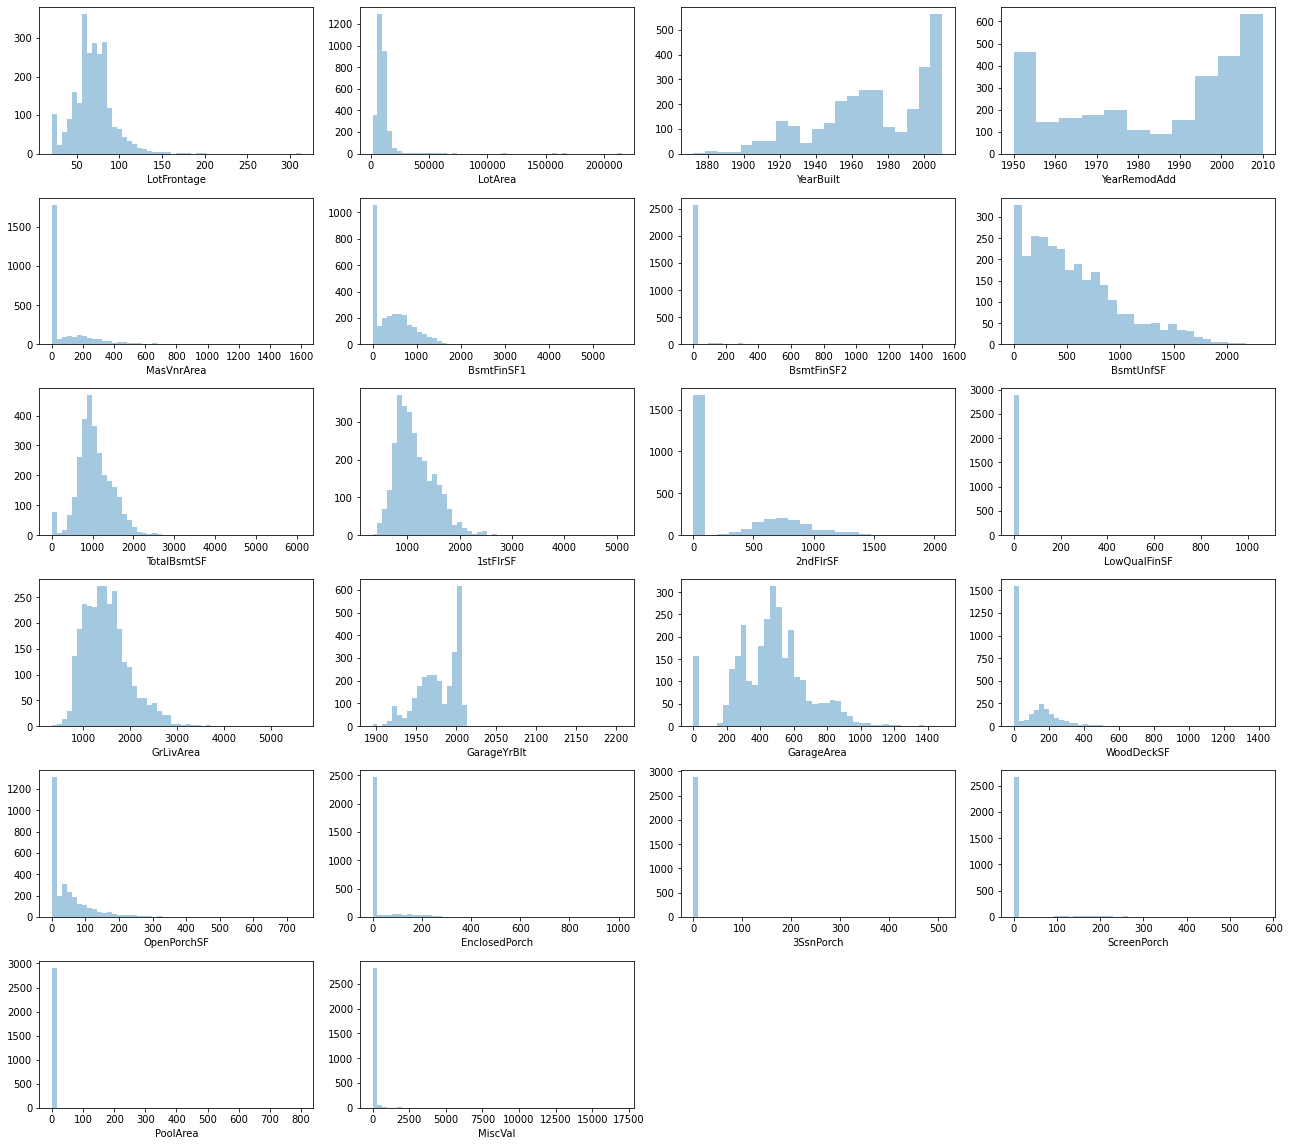

In [11]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

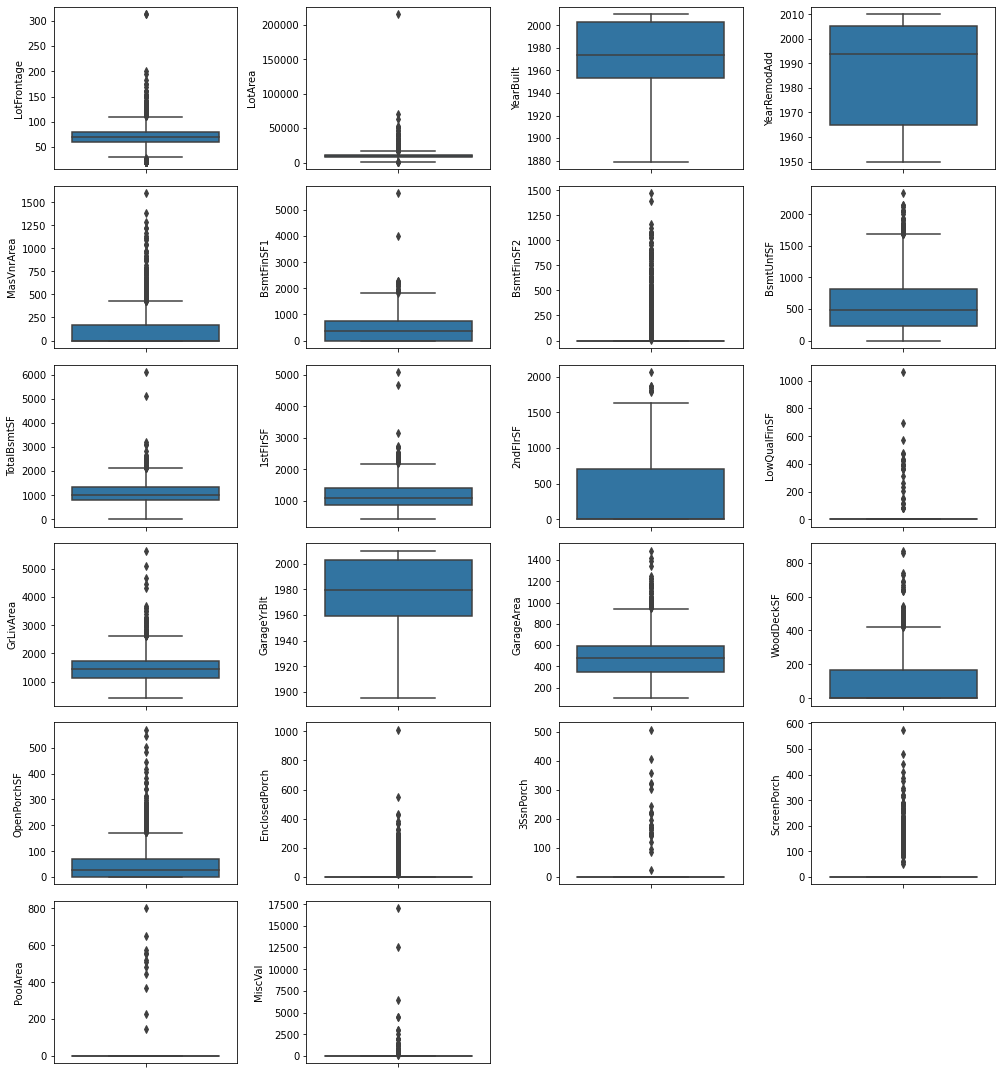

In [12]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

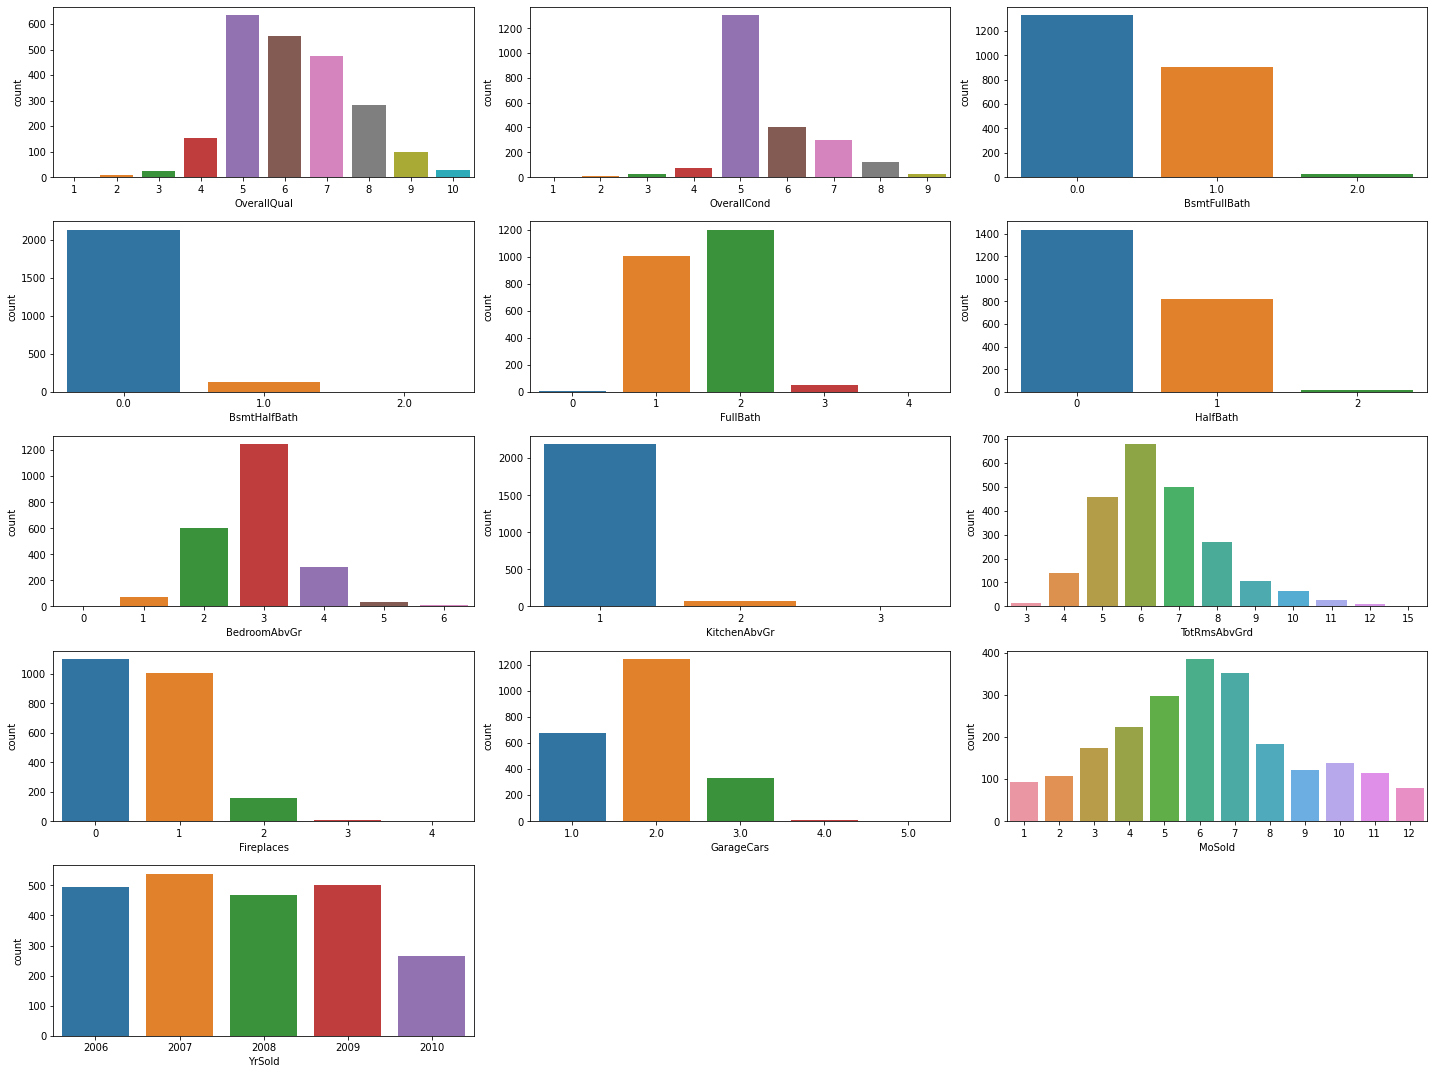

In [13]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

## Categorical feature

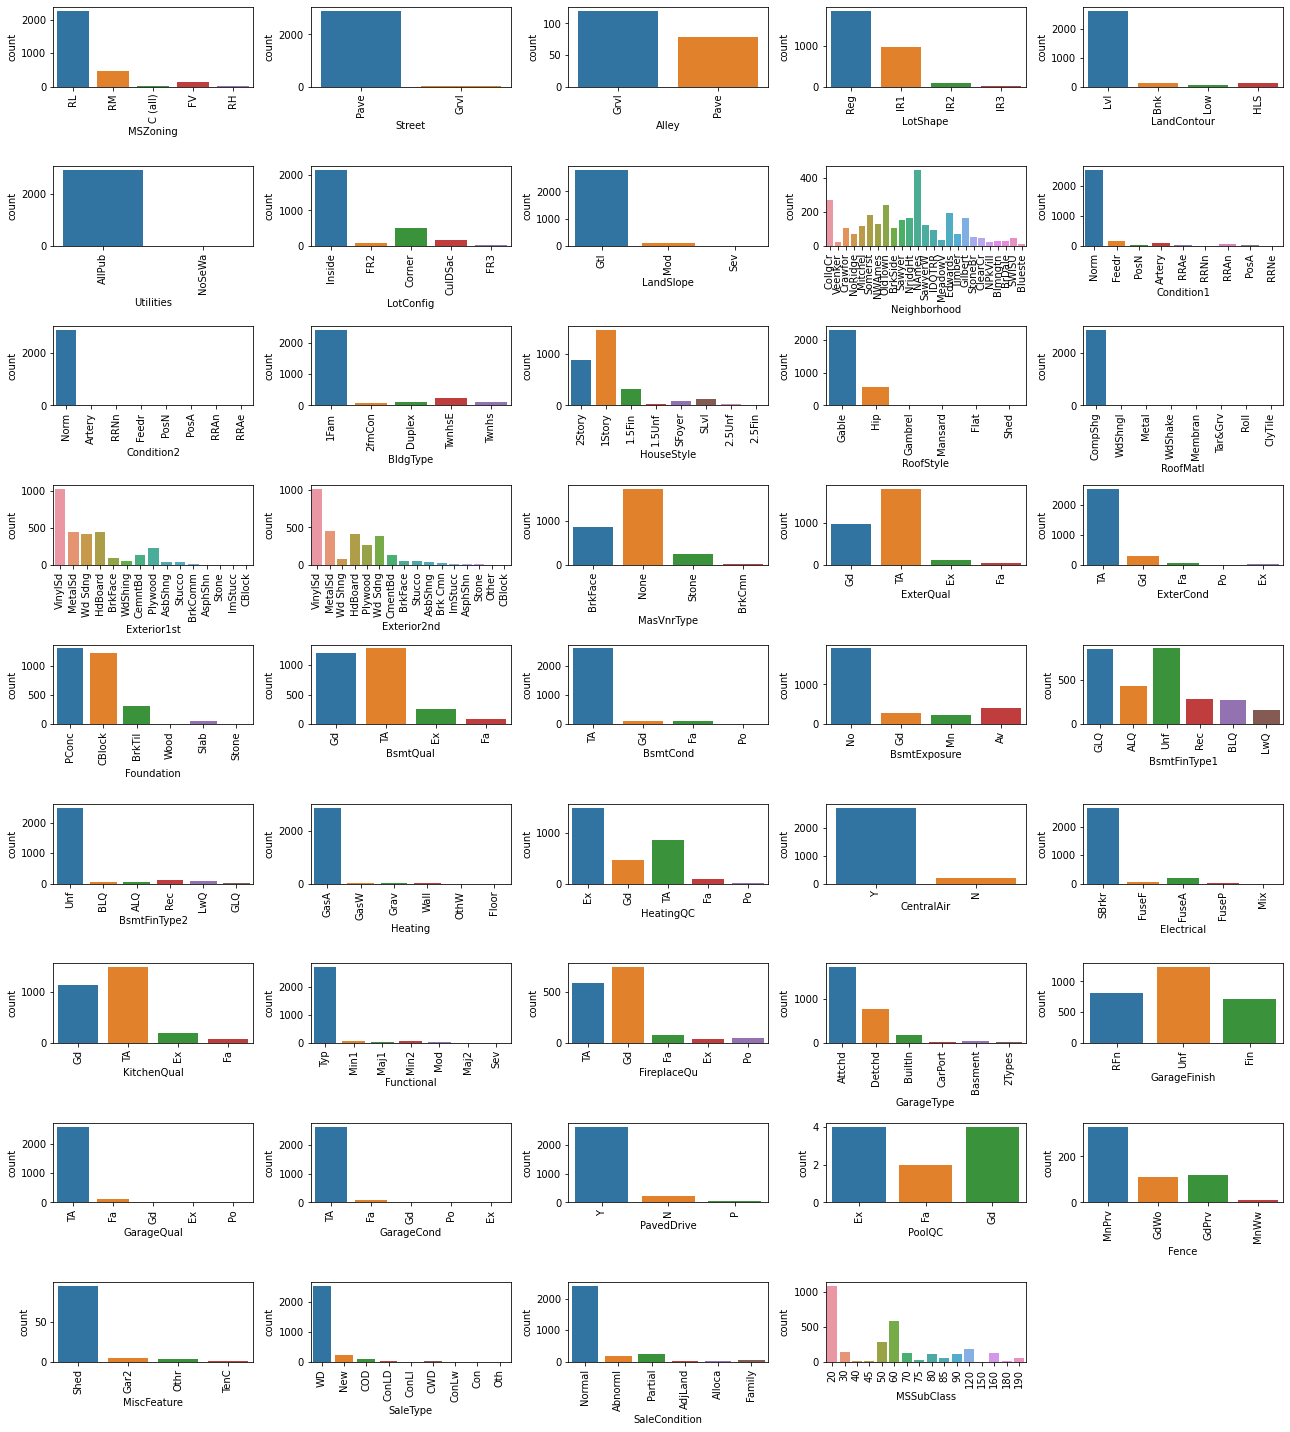

In [14]:
fig = plt.figure(figsize=(18,20))
for index in range(len(cat_train.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_train.iloc[:,index], data=cat_train.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

# Clean and transform

## Correlation Matrix

<AxesSubplot:>

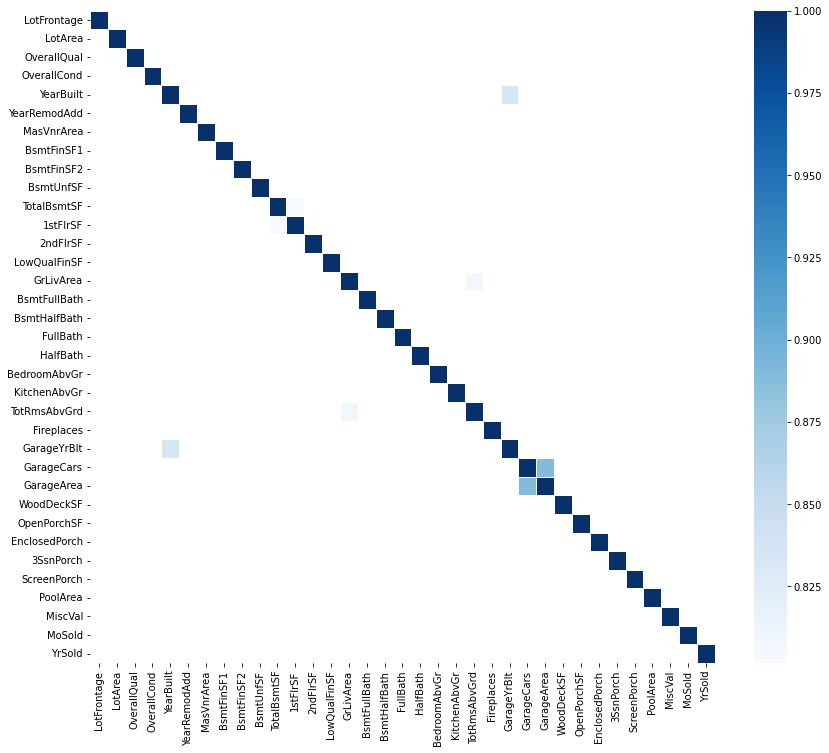

In [15]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

## Correlation

In [16]:
numeric_train = train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## Scatterplot

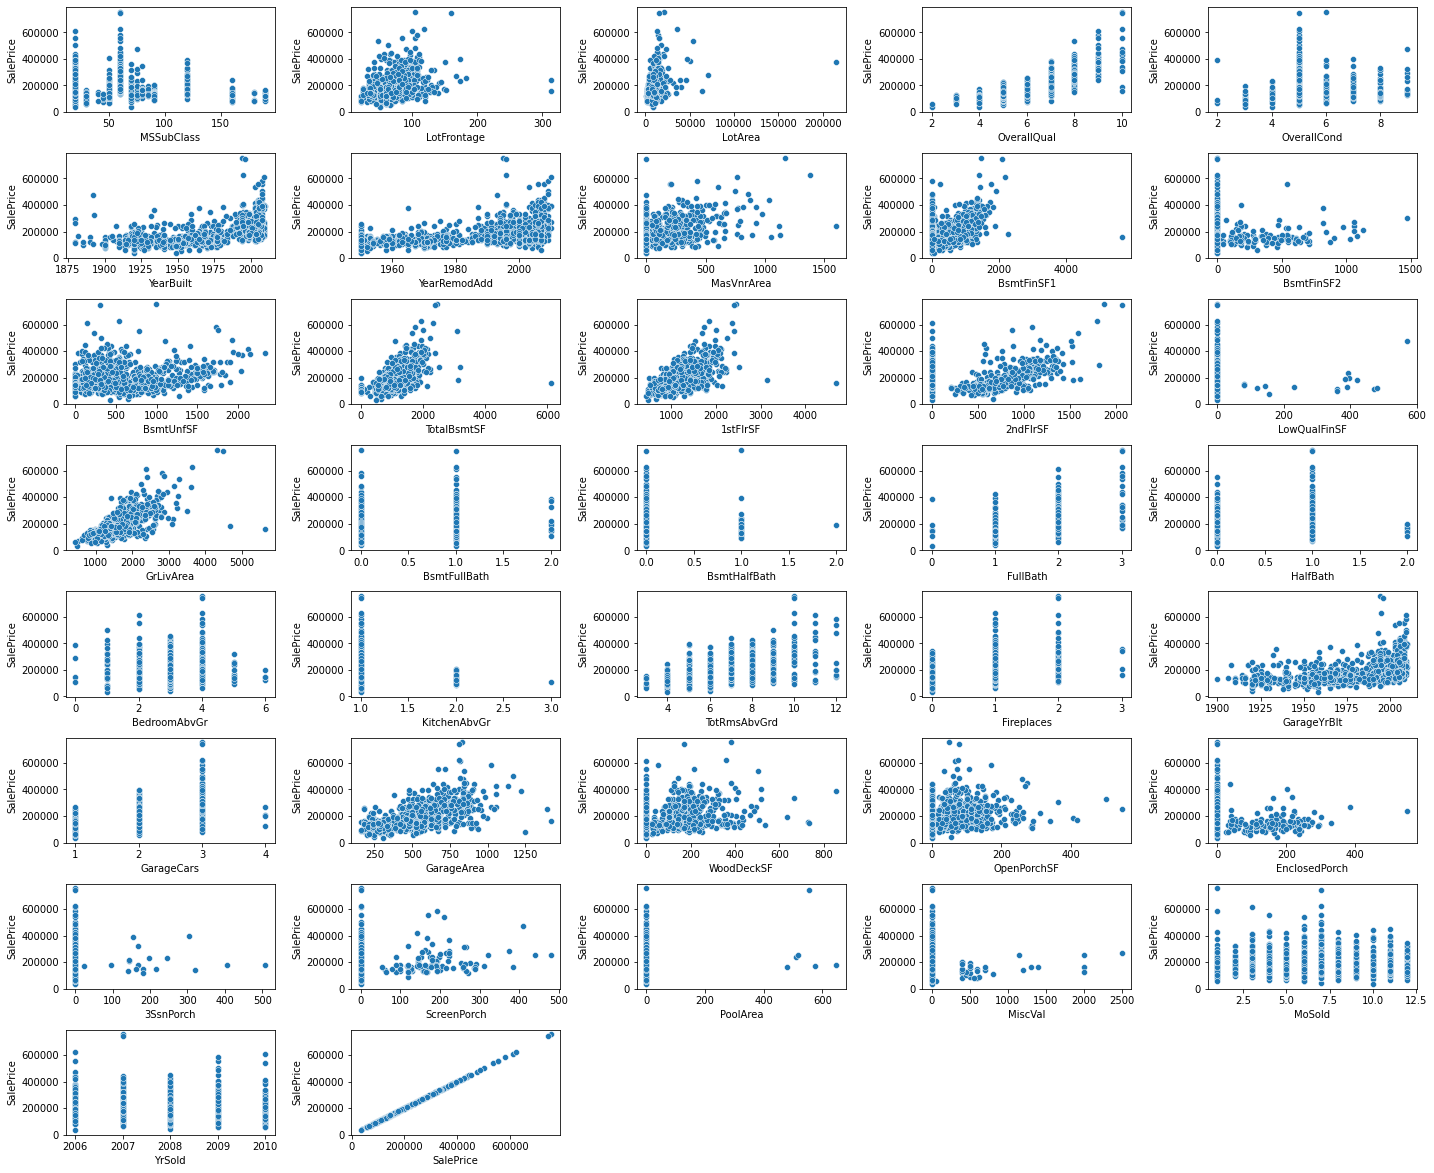

In [17]:
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

## Mutual Information

In [18]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
    
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def plot_cluester(X):
    Xy = X.copy()
    Xy["Cluster"] = Xy.Cluster.astype("category")
    Xy["SalePrice"] = y
    sns.relplot(
        x="value", y="SalePrice", hue="Cluster", col="variable",
        height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
        data=Xy.melt(
            value_vars=features, id_vars=["SalePrice", "Cluster"],
        ),
    );
    

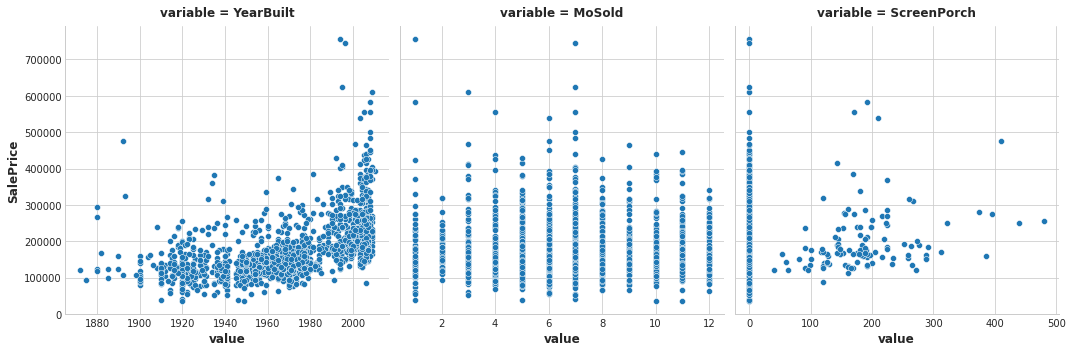

In [19]:
X_raw_full = X_raw_full.fillna(method='ffill')
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=X_raw_full.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [20]:
X_train_mi = X_raw_full.copy()
y_train_mi = X_train_mi.pop('SalePrice')

mi_scores = make_mi_scores(X_train_mi, y_train_mi)

OverallQual     0.578650
Neighborhood    0.525390
GarageArea      0.492795
GrLivArea       0.432808
YearBuilt       0.408715
TotalBsmtSF     0.399518
LotArea         0.392427
GarageCars      0.360102
ExterQual       0.325150
KitchenQual     0.322472
BsmtQual        0.290155
1stFlrSF        0.283265
MSSubClass      0.278183
YearRemodAdd    0.275659
FullBath        0.273156
GarageYrBlt     0.219262
TotRmsAbvGrd    0.207962
Foundation      0.192939
GarageFinish    0.189094
OpenPorchSF     0.189047
Name: MI Scores, dtype: float64


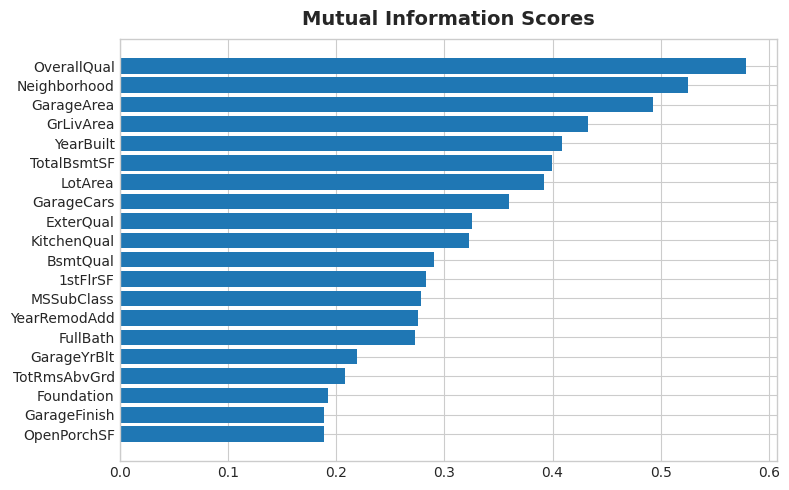

In [21]:
print(mi_scores.head(20))
#print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
#plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

In [22]:
mi_scores.head(10)

OverallQual     0.578650
Neighborhood    0.525390
GarageArea      0.492795
GrLivArea       0.432808
YearBuilt       0.408715
TotalBsmtSF     0.399518
LotArea         0.392427
GarageCars      0.360102
ExterQual       0.325150
KitchenQual     0.322472
Name: MI Scores, dtype: float64

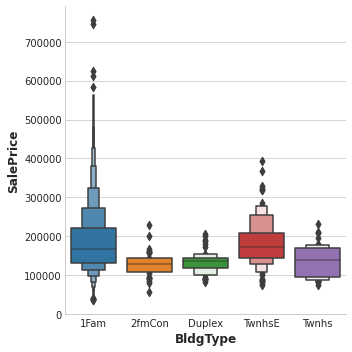

In [23]:
sns.catplot(x="BldgType", y="SalePrice", data=X_raw_full, kind="boxen");

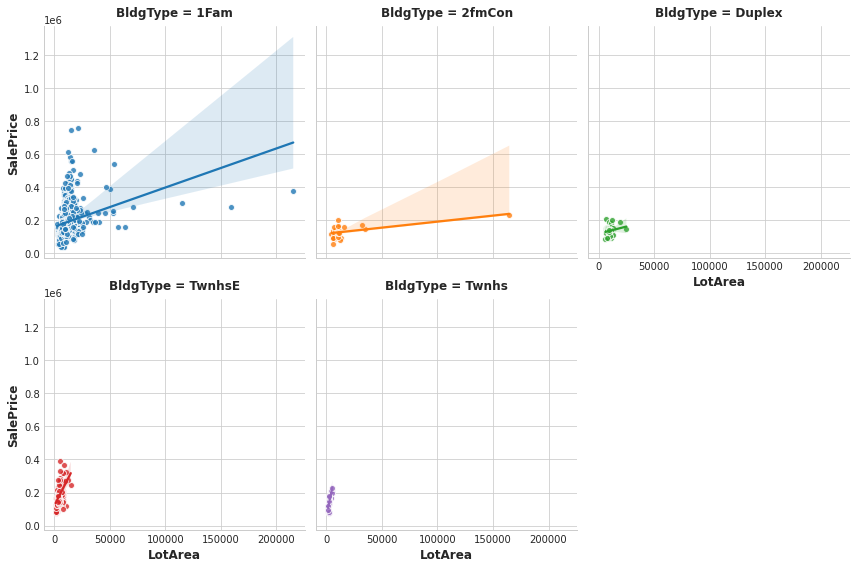

In [24]:
feature = "LotArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=X_raw_full, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

## Redundant features

### Multicollinearity - highly correlated features

In [25]:
X.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

In [26]:
[X.shape, y.shape]

[(2919, 75), (1460, 1)]

### Features with alot of missing values

<AxesSubplot:title={'center':'Number of missing rows'}, xlabel='features', ylabel='sum'>

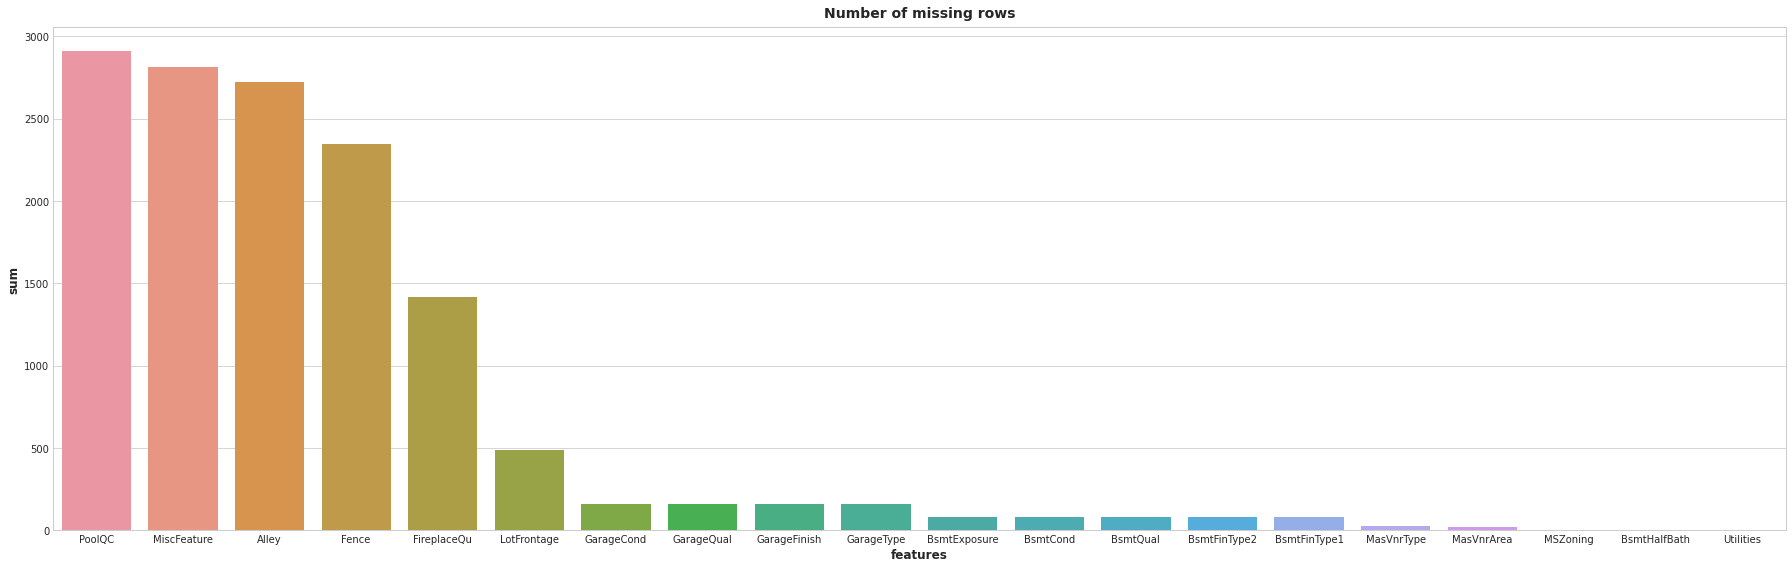

In [27]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

In [28]:
X.drop(['PoolQC','MiscFeature','Alley'], axis=1, inplace=True)

In [29]:
[X.shape, y.shape]

[(2919, 72), (1460, 1)]

### Useless features

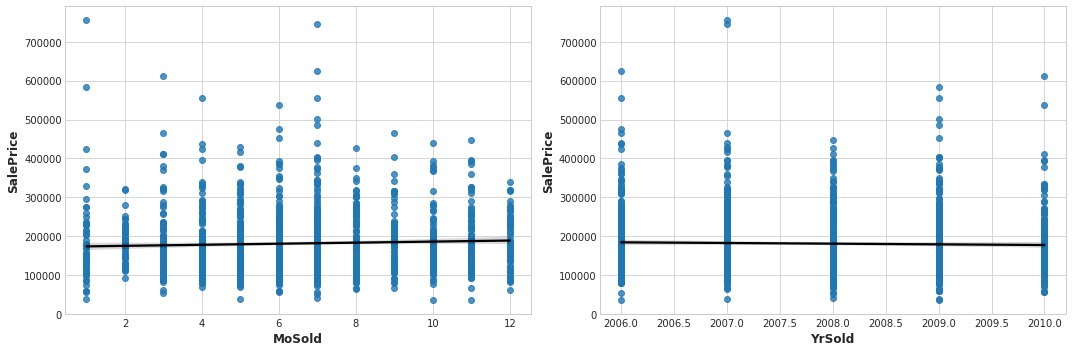

In [30]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax = axes[0], line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax = axes[1],line_kws={'color':'black'})
fig.tight_layout(pad=2.0)

In [31]:
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False).tail(10)

X.drop(['MoSold','YrSold'], axis=1, inplace=True)

In [32]:
[X.shape, y.shape]

[(2919, 70), (1460, 1)]

### Removing features that have mostly just 1 value

In [33]:
cat_col = X.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
X = X.drop(overfit_cat, axis=1)

In [34]:
num_col = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
X = X.drop(overfit_num, axis=1)

In [35]:
print("Categorical Features with >96% of the same value: ",overfit_cat)
print("Numerical Features with >96% of the same value: ",overfit_num)

Categorical Features with >96% of the same value:  ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
Numerical Features with >96% of the same value:  ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


In [36]:
[X.shape, y.shape]

[(2919, 61), (1460, 1)]

### Removing outliers

In [37]:
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)

In [38]:
[X.shape, y.shape]

[(2919, 61), (1460, 1)]

### Changing Data Type

In [39]:
X['MSSubClass'] = X['MSSubClass'].apply(str)

## Filling Missing Values

In [40]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(15)

,sum
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageFinish,159
GarageCond,159
GarageQual,159
GarageType,157
BsmtCond,82
BsmtExposure,82
BsmtQual,81


### Ordinal features

In [41]:
cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

X[cat] = X[cat].fillna("NA")

### Categorical features

In [42]:
#categorical
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
X[cols] = X.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))

### Numerical features

In [43]:
print("Mean of LotFrontage: ", X['LotFrontage'].mean())
print("Mean of GarageArea: ", X['GarageArea'].mean())

Mean of LotFrontage:  69.30579531442663
Mean of GarageArea:  472.8745716244003


<AxesSubplot:xlabel='Neighborhood', ylabel='GarageArea_mean'>

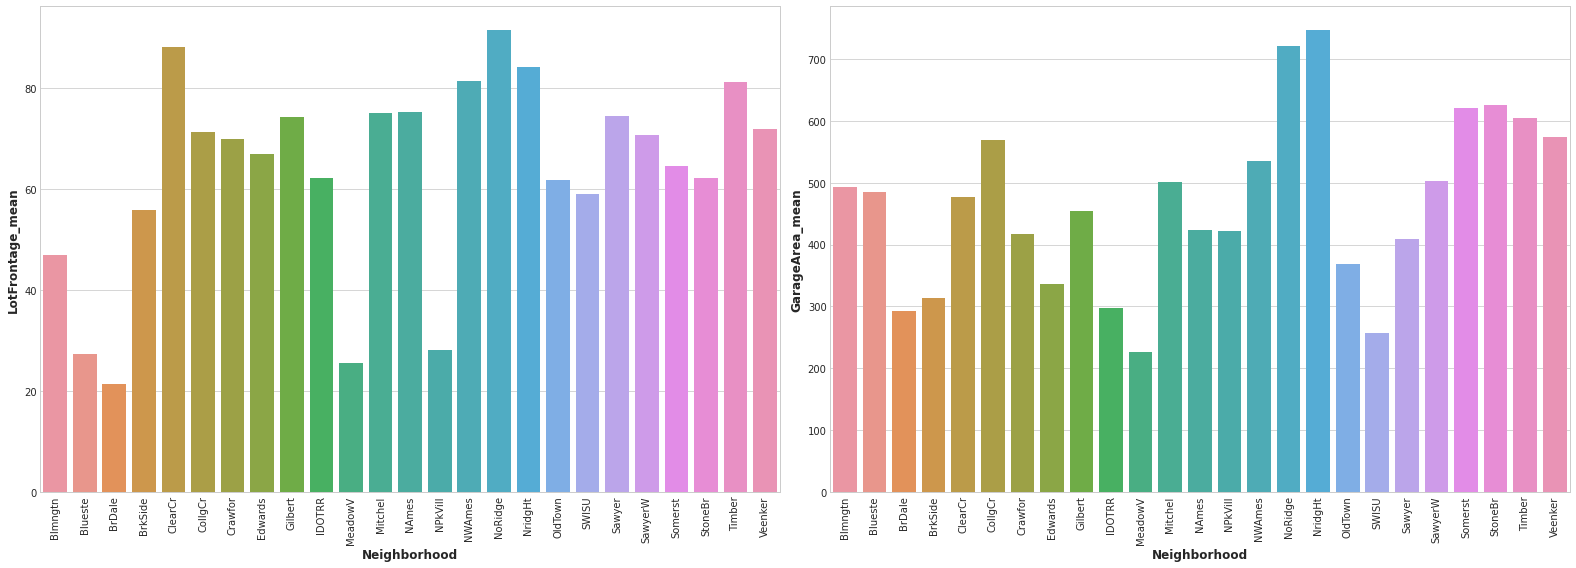

In [44]:
neigh_lot = X.groupby('Neighborhood')['LotFrontage'].mean().reset_index(name='LotFrontage_mean')
neigh_garage = X.groupby('Neighborhood')['GarageArea'].mean().reset_index(name='GarageArea_mean')

fig, axes = plt.subplots(1,2,figsize=(22,8))
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='LotFrontage_mean', data=neigh_lot, ax=axes[0])
axes[1].tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='GarageArea_mean', data=neigh_garage, ax=axes[1])

In [45]:
#for correlated relationship
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
X['GarageArea'] = X.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

#numerical
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
X[cont] = X[cont] = X[cont].fillna(X[cont].mean())

### Mapping Ordinal Features

In [46]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [47]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    X[col] = X[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)
X['Fence'] = X['Fence'].map(fence_map)

# Features Engineering

## Mathematical transforms

In [48]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

In [49]:
X['MSSubClass'].head()

Id
1    60
2    20
3    60
4    70
5    60
Name: MSSubClass, dtype: object

In [50]:
X.shape

(2919, 66)

### Binay Columns

In [51]:
colum = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']

for col in colum:
    col_name = col+'_bin'
    X[col_name] = X[col].apply(lambda x: 1 if x > 0 else 0)

### Log transformation on skewed target

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


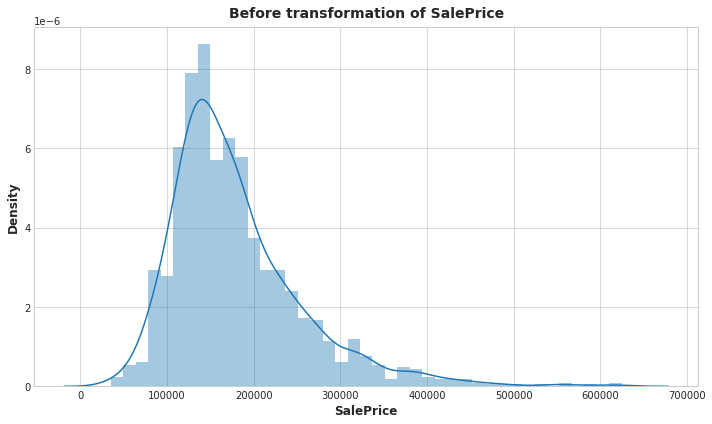

In [52]:
# before transforation
plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
dist = sns.distplot(train['SalePrice'],norm_hist=False)

In [53]:
y["SalePrice"] = np.log(y['SalePrice'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


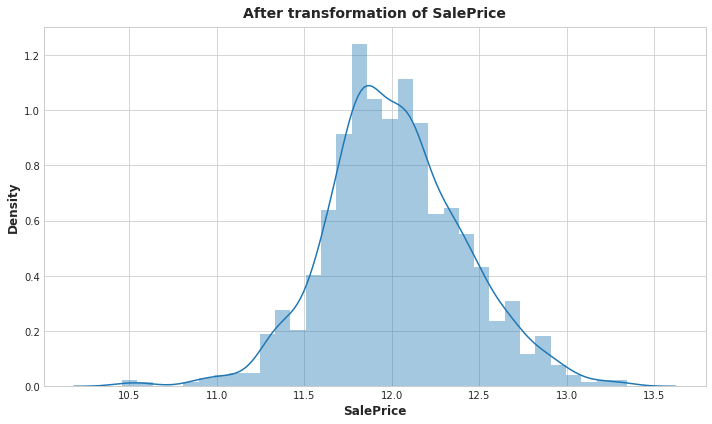

In [54]:
# after transforation
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(train['SalePrice']),norm_hist=False)

## Interaction with a categorical

In [55]:
# One-hot encode BldgType. Use `prefix="Bldg"` in `get_dummies`
X_2 = pd.get_dummies(X.BldgType, prefix="Bldg") 
# Multiply
X_2 = X_2.mul(X.GrLivArea, axis=0)

In [56]:
X_2.shape

(2919, 5)

## Count feature

In [57]:
X_3 = pd.DataFrame()

X_3["PorchTypes"] = X[[
                            "WoodDeckSF",
                            "OpenPorchSF",
                            "EnclosedPorch",
                            "ScreenPorch",
                        ]].gt(0.0).sum(axis=1)

In [58]:
X_3.shape

(2919, 1)

## Break down a categorical feature

In [59]:
X['MSSubClass'].unique()

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40', '150'], dtype=object)

In [60]:
X_4 = pd.DataFrame()

#X_4["MSClass"] = X_train_mi.MSSubClass.str.split("_", n=1, expand=True)[0]

## Grouped transform

In [61]:
X.shape

(2919, 72)

In [62]:
X['Neighborhood'].head()

Id
1    CollgCr
2    Veenker
3    CollgCr
4    Crawfor
5    NoRidge
Name: Neighborhood, dtype: object

In [63]:
X_5 = pd.DataFrame()

X_5["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")

In [64]:
X_5.head()

,MedNhbdArea
Id,
1,1504.0
2,1706.5
3,1504.0
4,1648.0
5,2418.0


## Merging features to training data

In [65]:
# X= X.join(
#             [ 
#                 X_2, 
#                 X_3, 
#                 X_5
#             ]
#         )

In [66]:
X.shape

(2919, 72)

## Clustering with K-Means

In [67]:
features = ['LotArea', 'TotalBsmtSF', '2ndFlrSF','GrLivArea']


# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)


# Fit the KMeans model to X_scaled and create the cluster labels
#kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)

In [68]:
#X["Cluster"] = kmeans.fit_predict(X_scaled)

In [69]:
#X["Cluster"]

## Cluster-distance features

In [70]:
# Create the cluster-distance features using `fit_transform`
#X_cd = kmeans.fit_transform(X_scaled)

# Label features and join to dataset
#X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
#X = X.join(X_cd)

In [71]:
X.shape

(2919, 72)

In [72]:
#plot_cluester(X)

## PCA

In [73]:
#Let's choose a few features that are highly correlated with our target, SalePrice.
features = [
    "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",
]

print("Correlation with SalePrice:\n")
print(X[features].corrwith(correlation.SalePrice))

Correlation with SalePrice:

GarageArea     NaN
YearRemodAdd   NaN
TotalBsmtSF    NaN
GrLivArea      NaN
dtype: float64


In [74]:
X_train_pca = X.loc[:, features]

# `apply_pca`, defined above, reproduces the code from the tutorial
pca, X_pca, loadings = apply_pca(X_train_pca)
print(loadings)

#X_train_mi.head()
X_train_pca.head()
X_train_pca.shape

                   PC1       PC2       PC3       PC4
GarageArea    0.541563  0.100839 -0.032704  0.833949
YearRemodAdd  0.426962 -0.886239 -0.051546 -0.172127
TotalBsmtSF   0.509751  0.362411 -0.669277 -0.401098
GrLivArea     0.514360  0.270316  0.740501 -0.337670


(2919, 4)

In [75]:
#X["Feature1"] = X_train_pca.GrLivArea + X_train_pca.TotalBsmtSF
#X["Feature2"] = X_train_pca.YearRemodAdd * X_train_pca.TotalBsmtSF

In [76]:
X.shape

(2919, 72)

In [77]:
# sns.catplot(
#     y="value",
#     col="variable",
#     data=X_pca.melt(),
#     kind='boxen',
#     sharey=False,
#     col_wrap=2,
# );

In [78]:
# You can change PC1 to PC2, PC3, or PC4
# component = "PC1"

# idx = X_pca[component].sort_values(ascending=False).index
# X_train.loc[idx, ["SalePrice", "Neighborhood", "SaleCondition"] + features]

## Target encoding

In [79]:
X.select_dtypes(["object"]).nunique()

MSSubClass       16
MSZoning          5
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
BldgType          5
HouseStyle        8
RoofStyle         6
Exterior1st      15
Exterior2nd      16
MasVnrType        4
Foundation        6
CentralAir        2
Electrical        5
Functional        7
GarageType        7
GarageFinish      4
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [80]:
X["SaleType"].value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [81]:
# x.head
# y.head

In [82]:
# X_encode = X.sample(frac=0.20, random_state=0)
# y_encode = y

# X_pretrain = X.drop(X_encode.index)
# y_train = y[X_pretrain.index]

In [83]:
# # Create the encoder instance. Choose m to control noise.
# encoder = MEstimateEncoder(cols=["Neighborhood", "Exterior1st", "Exterior2nd", "SaleType"], m=5.0)

# # Fit the encoder on the encoding split.
# encoder.fit(X_encode, y_encode)

# # Encode the Zipcode column to create the final training data
# X_train = encoder.transform(X_pretrain)

In [84]:
# [X_train.head]

In [85]:
# [X.shape, y.shape]

In [86]:
# feature = encoder.cols

# plt.figure(dpi=90)
# ax = sns.distplot(y_train, kde=True, hist=False)
# ax = sns.distplot(X_train[feature], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
# ax.set_xlabel("SalePrice");

## Split into train-validation set

In [87]:
x = X.loc[train.index]
y = y.loc[train.index]
test = X.loc[test.index]

## Scaling

In [88]:
cols = x.select_dtypes(np.number).columns
transformer = RobustScaler().fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

In [89]:
[test.shape, x.shape]

[(1459, 72), (1451, 72)]

# Define model

In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=2020)

In [91]:
[X_train.shape, y_train.shape]

[(1160, 72), (1160, 1)]

In [92]:
[X_valid.shape, y_valid.shape]

[(291, 72), (291, 1)]

In [93]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if
                    #X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('standardize', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
        #('encoder', OrdinalEncoder())
]) 

# Bundle preprocessing for numerical and categorical data
# Instead of using a transformer, you can specify the string "drop"
# if you want the columns to be dropped, or you can specify
# "passthrough" if you want the columns to be left untouched. By
# default, the remaining columns (i.e., the ones that were not listed)
# will be dropped, but you can set the remainder hyperparameter to
# any transformer (or to "passthrough") if you want these columns
# to be handled differently.
preprocessor = ColumnTransformer(
                transformers=[
                    #('robustScaler', RobustScaler()),
                    #('reduce_dims', PCA(n_components=4)),
                    ('num', numerical_transformer, numerical_cols),
                    ('cat', categorical_transformer, categorical_cols)
                ])

In [94]:
# Define model

#model = RandomForestRegressor(n_estimators=100, random_state=0)
# model = GradientBoostingRegressor(
#                                      max_depth=5, learning_rate=0.03333, n_estimators=10000,
#                                      n_iter_no_change=20, random_state=0)
#model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
#model = XGBRegressor(n_estimators = 15000, learning_rate = 0.005, max_depth = 12, n_jobs = 10, verbosity = 0)
#model = XGBRegressor(booster='gbtree')

# Fine-Tune model

In [95]:
X_train.describe

<bound method NDFrame.describe of      MSSubClass MSZoning  LotFrontage   LotArea LotShape LandContour  \
Id                                                                     
512         120       RL    -1.533491 -0.666917      IR1         Lvl   
921          60       RL    -0.033491 -0.248214      IR1         Lvl   
324          20       RM    -1.083491 -0.910618      Reg         Lvl   
1184         30       RL    -0.533491  0.337972      Reg         Lvl   
413          20       FV    -0.306021 -1.265889      IR2         Lvl   
...         ...      ...          ...       ...      ...         ...   
92           20       RL     0.716509 -0.238686      Reg         Lvl   
635          90       RL    -0.333491 -0.620033      Reg         Lvl   
1357         20       RL     0.227043  0.006268      Reg         Lvl   
396          20       RL    -0.133491  0.029836      Reg         Lvl   
871          20       RL    -0.533491 -0.715056      Reg         Lvl   

     LotConfig LandSlope Neig

In [96]:
[X_train.shape, y_train.shape]

[(1160, 72), (1160, 1)]

### XGBoost

In [97]:
xgb_dflt = XGBRegressor()

param_lst_xgb = {
    'learning_rate' : [0.01, 0.03, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000, 4000, 7000, 10000, 15000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}

xgb_reg = RandomizedSearchCV(
                                estimator = xgb_dflt, 
                                param_distributions = param_lst_xgb,
                                n_iter = 100, 
                                scoring = 'neg_mean_absolute_error',
                                n_jobs = 20,
                                cv = 5
                            )

# Bundle preprocessing and modeling code in a pipeline
xgb_pipeline = Pipeline(steps=[
                                ('preprocessor', preprocessor),
                                ('model_xgb_RandomizedSearchCV', xgb_reg)
                             ])
       
xgb_search = xgb_pipeline.fit(X_train, y_train)

# XGB with tune hyperparameters
xgb = XGBRegressor(**xgb_search.named_steps['model_xgb_RandomizedSearchCV'].best_params_)

KeyboardInterrupt: 

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
xgb_pipeline_best_params = Pipeline(steps=[
                                ('preprocessor', preprocessor),
                                ('model', xgb)
                             ])

xgb_pipeline_best_params.fit(X_train, y_train)

In [ ]:
xgb_search.named_steps['model_xgb_RandomizedSearchCV'].best_params_

In [ ]:
xgb_search.named_steps['model_xgb_RandomizedSearchCV'].best_score_

In [ ]:
xgb_search.named_steps['model_xgb_RandomizedSearchCV'].best_estimator_

In [ ]:
#xgb_search.named_steps['model_xgb'].cv_results_
xgb_search.named_steps['model_xgb_RandomizedSearchCV'].cv_results_['mean_test_score']

In [ ]:
# def plot_maxdeph_score(rd_search):
#     max_depth = [item['model__max_depth'] for item in rd_search.cv_results_['params']]
#     scores = list(rd_search.cv_results_['mean_test_score'])
#     d = pd.DataFrame([max_depth, scores]).T
#     d.columns = ['Max Depth','Score']
#     d.groupby(['Max Depth']).mean()
#     return d

In [ ]:
# plot_maxdeph_score(xgb_search)

## LightGBM

In [ ]:
lgbm_dflt = LGBMRegressor(boosting_type='gbdt',objective='regression', max_depth=-1,
                    lambda_l1=0.0001, lambda_l2=0, learning_rate=0.1,
                    n_estimators=100, max_bin=200, min_child_samples=20, 
                    bagging_fraction=0.75, bagging_freq=5,
                    bagging_seed=7, feature_fraction=0.8,
                    feature_fraction_seed=7, verbose=-1)

param_lst_lgbm = {
    'max_depth' : [2, 5, 8, 10],
    'learning_rate' : [0.001, 0.01, 0.03, 0.1, 0.2],
    'n_estimators' : [100, 300, 500, 1000, 1500, 4000, 7000, 10000, 15000],
    'lambda_l1' : [0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.4, 0.6, 0.8],
    'min_child_samples' : [5, 10, 20, 25]
}

lightgbm = RandomizedSearchCV(estimator = lgbm_dflt, 
                              param_distributions = param_lst_lgbm,
                              n_iter = 100, 
                              scoring = 'neg_mean_absolute_error',
                              n_jobs = 20,
                              cv = 5)

lgbm_pipeline = Pipeline(steps=[
                                ('preprocessor', preprocessor),
                                ('model_lightgbm_RandomizedSearchCV', lightgbm)
                             ])

# lightgbm_search = lgbm_pipeline.fit(X_train, y_train)

# LightBGM with tuned hyperparameters
# lgbm = LGBMRegressor(**lightgbm_search.named_steps['model_lightgbm_RandomizedSearchCV'].best_params_, verbose_eval=False)

In [ ]:
# lgbm_pipeline_best_params = Pipeline(steps=[
#                                 ('preprocessor', preprocessor),
#                                 ('model', lgbm)
#                              ])

# lgbm_pipeline_best_params.fit(X_train, y_train)

In [ ]:
# lightgbm_search.named_steps['model_lightgbm_RandomizedSearchCV'].best_score_

## CatBoost

In [ ]:
cb_dflt = CatBoostRegressor(logging_level='Silent')

param_lst_cb = {
    'n_estimators' : [100, 300, 500, 1000, 1300, 1600, 4000, 7000, 10000, 15000],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.03, 0.1],
    'l2_leaf_reg' : [0.001, 0.01, 0.1],
    'random_strength' : [0.25, 0.5 ,1],
    'max_depth' : [3, 6, 9],
    'min_child_samples' : [2, 5, 10, 15, 20],
    'rsm' : [0.5, 0.7, 0.9]
}

catboost = RandomizedSearchCV(estimator = cb_dflt, 
                              param_distributions = param_lst_cb,
                              n_iter = 100, 
                              scoring = 'neg_mean_absolute_error', 
                              n_jobs = 20,
                              cv = 5)

cb_pipeline = Pipeline(steps=[
                                ('preprocessor', preprocessor),
                                ('model_catboost_RandomizedSearchCV', catboost)
                             ])

catboost_search = cb_pipeline.fit(X_train, y_train)

# CatBoost with tuned hyperparams
cb = CatBoostRegressor(**catboost_search.named_steps['model_catboost_RandomizedSearchCV'].best_params_, logging_level='Silent')

In [ ]:
# # Bundle preprocessing and modeling code in a pipeline
cb_pipeline = Pipeline(steps=[
                                ('preprocessor', preprocessor),
                                ('model', cb)
                             ])

cb_pipeline.fit(X_train, y_train)

In [ ]:
catboost_search.named_steps['model_catboost_RandomizedSearchCV'].best_score_

# Training

## Cross validation trainning

In [ ]:
# cros_rmses = -cross_val_score(my_pipeline, X_train, y_train, scoring="neg_mean_absolute_error", cv=5)


def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y,scoring="neg_mean_absolute_error", cv=5)
    mean = score.mean()
    return mean

## Validate best pipe with test data

In [ ]:
[x.shape,y.shape]

In [ ]:
preds = xgb_pipeline.predict(X_valid)

score_mae = mean_absolute_error(y_valid, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, preds))
score_xgb = xgb_pipeline.score(X_valid, y_valid)
#cv_xgb = mean_cross_val(xgb_pipeline, x, y)

print('MAE:', score_mae)
print('Score:', score_xgb)
print('RMSE:', rmse_xgb)
#print('CV:', cv_xgb)

In [ ]:
preds = lgbm_pipeline.predict(X_valid)

score_mae = mean_absolute_error(y_valid, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, preds))
score_lgbm = lgbm_pipeline.score(X_valid, y_valid)
#cv_lgbm = mean_cross_val(lgbm_pipeline, x, y)

print('MAE:', score_mae)
print('Score:', score_lgbm)
print('RMSE:', rmse_xgb)
#print('CV:', cv_lgbm)

In [ ]:
preds = cb_pipeline.predict(X_valid)

score_mae = mean_absolute_error(y_valid, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_valid, preds))
score_cb = cb_pipeline.score(X_valid, y_valid)
#cv_cb = mean_cross_val(cb_pipeline, x, y)

print('MAE:', score_mae)
print('Score:', score_cb)
print('RMSE:', rmse_xgb)
#print('CV:', cv_cb)

# Test evaluation

In [ ]:
 def blend_models_predict(X, b, c, d):
        return ((b* xgb_pipeline.predict(X)) + (c * lgbm_pipeline.predict(X)) + (d * cb_pipeline.predict(X)))

In [ ]:
subm = np.exp(blend_models_predict(test, 0.4, 0.3, 0.3))
print(subm)

# Save test predictions to file

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Id': test.index,
                       'SalePrice': subm})
output.to_csv('submission.csv', index=False)